<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Выделим-обучающие-и-целевой-признаки" data-toc-modified-id="Выделим-обучающие-и-целевой-признаки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выделим обучающие и целевой признаки</a></span></li><li><span><a href="#Сгенерируем-случайную-матрицу-и-проверим-её-на-обратимость" data-toc-modified-id="Сгенерируем-случайную-матрицу-и-проверим-её-на-обратимость-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сгенерируем случайную матрицу и проверим её на обратимость</a></span></li><li><span><a href="#Создадим-класс-LinearRegression-с-методами-fit()-и-predict()" data-toc-modified-id="Создадим-класс-LinearRegression-с-методами-fit()-и-predict()-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Создадим класс LinearRegression с методами fit() и predict()</a></span></li><li><span><a href="#Обучим-модель-и-проверим-её-качество" data-toc-modified-id="Обучим-модель-и-проверим-её-качество-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Обучим модель и проверим её качество</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [ ]:
#импортируем необходимые для работы библиотеки
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#считаем датасет и сохраним его в переменной
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

data.head() #выведем первые 5 строк получившегося датафрейма

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
data.info() #выведем основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропусков нет. Посмотрим на наличие полных дубликатов:

In [ ]:
print('Количество полных дубликатов в датафрейме:', data.duplicated().sum())

Количество полных дубликатов в датафрейме: 153


Удалим полные дубликаты:

In [ ]:
data = data.drop_duplicates()

В столбцах "Возраст" и "Зарплата" данные хранятся в типе float64, хотя все значения целочисленные. Переведём данные, содержащиеся в этих столбцах, в int64.

In [ ]:
data['Возраст'] = data['Возраст'].astype('int64')
data['Зарплата'] = data['Зарплата'].astype('int64')

In [ ]:
data.info() #снова выведем основную информацию о датафрейме после всех преобразований

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB


Посмотрим на распределение данных с помощью метода describe().

In [ ]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Теперь для категориальных признаков построим гистограммы, а для количественных - "ящик с усами".

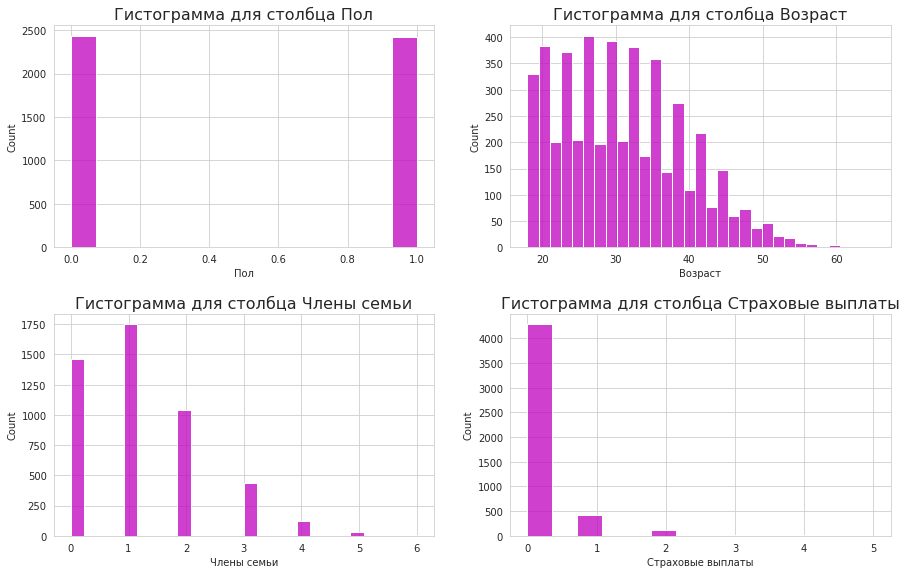

In [ ]:
cat_features = ['Пол', 'Возраст', 'Члены семьи', 'Страховые выплаты']

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.3)
sns.set_style('whitegrid')

position = 0

for feature in cat_features:
    position += 1
    plt.subplot(4, 2, position)
    plt.title(f'Гистограмма для столбца {feature}', fontsize=16)
    sns.histplot(data[feature], color='m')
plt.show();

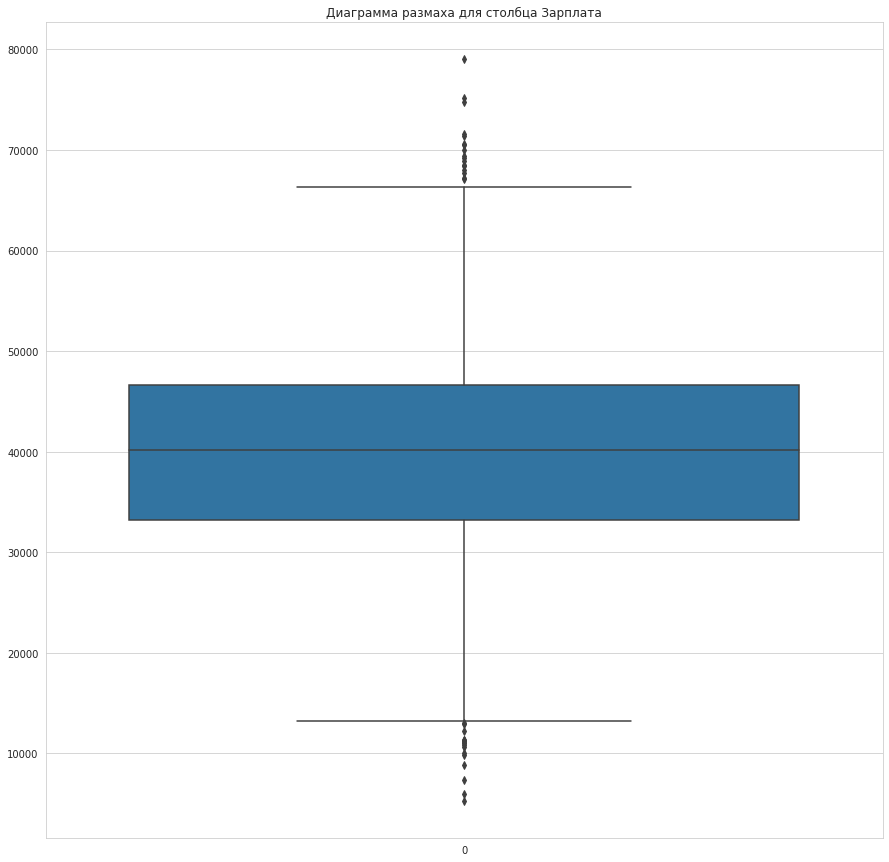

In [ ]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=data['Зарплата'])
plt.title('Диаграмма размаха для столбца Зарплата')
plt.show()

Мы видим, что, в целом, данные распределены нормально, хотя наблюдаются выбросы в столбцах Зарплата и Возраст. Также мы видим, что в столбце с целевым признаком - Страховые выплаты - наблюдается дисбаланс классов, так как подавляющее большинство значений составляет "0". Поскольку подбирать наилучшую модель по условиям исследования не требуется, оставим данные в исходном виде. В противном случае стоит подробнее изучить и по необходимости удалить выбросы, а также перед обучением модели сбалансировать целевой признак с помощью upsampling или downsampling.

**Вывод:** мы считали данные и сохранили их в переменную, убедились в отсутствии пропусков, удалили явные дубликаты и поменяли тип данных в двух столбцах для удобства работы, а также изучили распределение данных.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.*

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** Нет, качество линейной регрессии не изменится.

**Обоснование:** Используем формулу предсказания и формулу обучения. Пусть $Z$ - матрица, получившаяся в результате умножения признаков на обратимую матрицу:

$$
Z = XP
$$

Нам нужно выяснить, равны ли предсказания $a$ (для исходной матрицы признаков $X$) и $a'$ (для матрицы $Z$).

Запишем формулу предсказания $a'$:

$$
a' = Zw'
$$

Также запишем формулу обучения для $Z$ - обозначим её $w'$:

$$
w' = (Z^T Z)^{-1} Z^T y
$$

Выразим $Z$ через $XP$:

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$

Далее преобразуем формулу, раскрывая скобки:

$$
w' = (P^T X^T X P)^{-1} (XP)^T y
$$

$$
w' = P^{-1} (P^T)^{-1} (X^T X)^{-1} (XP)^T y
$$

$$
w' = P^{-1} (P^T)^{-1} (X^T X)^{-1} X^T P^T y
$$

У нас есть матрица $P^T$ и обратная ей матрица $(P^T)^{-1}$. Мы знаем, что при умножении друг на друга они дают $E$ - единичную матрицу:

$$
w' = P^{-1} E (X^T X)^{-1} X^T y
$$

Здесь мы видим $(X^T X)^{-1} X^T y$, которое равно $w$:

$$
w' = P^{-1} E w
$$

Мы также знаем, что, если любую матрицу умножить на единичную (или наоборот), получится эта же матрица - следовательно, сократим $E$:

$$
w' = P^{-1} w
$$

Вернёмся к формуле предсказания $a'$ и выразим $Z$ через $XP$, а $w'$ - через $P^{-1} w$:

$$
a' = Zw' = X P P^{-1} w
$$

Здесь мы снова получаем единичную матрицу $E$, которая при умножении на $X$ даёт ту же матрицу $X$:

$$
a' = X E w
$$

$$
a' = X w
$$

Таким образом, $a = Xw$ и $a' = Xw$ - следовательно, предсказания для исходной матрицы и для матрицы, умноженной на обратимую, равны.

**Вывод:** использовав формулу предсказания и формулу обучения мы выяснили, что при умножении матрицы признаков на обратимую матрицу качество линейной регрессии не изменится.

## Алгоритм преобразования

**Алгоритм**

1) Разделим данные на обучающие и целевой признаки.

2) Сгенерируем случайную матрицу и проверим её на обратимость.

3) Создадим класс LinearRegression с методами fit() и predict().

4) Создадим модель, обучим её и получим предсказания. Проверим качество модели с помощью метрики R2 на исходной матрице признаков и матрице, домноженной на случайную обратимую. Сравним показатели R2.

**Обоснование**

С помощью этого алгоритма мы сможем проверить способ шифрования данных пользователей, при котором матрица с признакми (персональными данными) домножается на случайную обратимую матрицу, и оценить качество модели при использовании этого метода, а также сравнить качество с использованием модели на исходных признаках.

## Проверка алгоритма

### Выделим обучающие и целевой признаки

In [ ]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

### Сгенерируем случайную матрицу и проверим её на обратимость

In [ ]:
P = np.random.normal(size=(4, 4)) #генерируем случайную матрицу с нормальным распределением значений

#проверяем её на обратимость
try:
    inv_P = np.linalg.inv(P)
    print('Для случайно сгенерированной матрицы существует обратимая матрица')
except:
    print('Для случайно сгенерированной матрицы не существует обратимой матрицы')

Для случайно сгенерированной матрицы существует обратимая матрица


### Создадим класс LinearRegression с методами fit() и predict()

In [ ]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

### Обучим модель и проверим её качество

Создадим функцию, которая принимает на вход обучающие и целевой признаки, обучает модель линейной регрессии, делает предсказания и возвращает значение метрики качества R2.

In [ ]:
def lr_model(features, target):
    features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=12345
                                                                           )
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    return r2_score(target_test, predictions)

Проверим модель на исходных обучающих признаках и вычислим значение R2.

In [ ]:
r2_initial = lr_model(features, target)
print('R2 для исходных признаков', r2_initial)

R2 для исходных признаков 0.423077276158367


Теперь повторим то же, взяв в качестве обучающих признаков исходную матрицу, умноженную на случайную обратимую матрицу, которую мы сгенерировали ранее.

In [ ]:
new_features = features @ P
r2_new = lr_model(new_features, target)
print('R2 для преобразованных признаков', r2_new)

R2 для преобразованных признаков 0.4230772745069533


Сравним получившиеся показатели R2: вычислим разницу между ними.

In [ ]:
print('Разница между показателями R2:', np.abs(r2_new - r2_initial))

Разница между показателями R2: 1.651413672476565e-09


Разница между метрикой качества R2 оказалась минимальной: 1.651413672476565e-09. Таким образом, можно сказать, что при умножении матрицы исходных признаков на обратимую матрицу качество линейной регрессии не меняется. Следовательно, можно использовать этот способ для шифрования персональных данных без потери качества линейной регрессии.

## Вывод

Мы провели исследование, целью которого являлась разработка такого метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию клиентов страховой компании «Хоть потоп».

1) Мы считали данные и сохранили их в переменную, убедились в отсутствии пропусков, удалили явные дубликаты и поменяли тип данных в двух столбцах для удобства работы, а также изучили распределение данных.

2) Использовав формулу предсказания и формулу обучения мы выяснили, что при умножении матрицы признаков на обратимую матрицу качество линейной регрессии не изменится.

3) Мы подготовили алгоритм преобразования данных:

    - разделить данные на обучающие и целевой признаки;
    
    - сгенерировать случайную матрицу и проверить её на обратимость;
    
    - создать класс LinearRegression с методами fit() и predict();
    
    - создать модель, обучить её и получить предсказания. Проверить качество модели с помощью метрики R2 на исходной матрице признаков и матрице, домноженной на случайную обратимую. Сравнить показатели R2.
    
С помощью этого алгоритма мы смогли проверить способ шифрования данных пользователей, при котором матрица с признакми (персональными данными) домножается на случайную обратимую матрицу, и оценить качество модели при использовании этого метода, а также сравнить качество с использованием модели на исходных признаках.  

4) Выполнив все шаги описанного выше алгоритма, мы выяснили, что метрика R2 на исходной матрице признаков и матрице, домноженной на случайную обратимую, отличается минимально: разница между ними составила 1.651413672476565e-09.

**Таким образом, можно сказать, что при умножении матрицы исходных признаков на обратимую матрицу качество линейной регрессии не меняется. Следовательно, можно использовать этот способ для шифрования персональных данных без потери качества линейной регрессии.**